<a href="https://colab.research.google.com/github/Praagnya/testrep/blob/master/Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
from sklearn import preprocessing
from collections import defaultdict
from surprise import accuracy
from surprise import Reader
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_1.csv', engine='python')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_2.csv',engine = 'python')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_3.csv',engine = 'python')
df4 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_4.csv',engine = 'python')
df5 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_5.csv',engine = 'python')
df6 = pd.read_csv('/content/drive/MyDrive/Datasets/recommendation sytems/phone_user_review_file_6.csv',engine = 'python')

In [4]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [5]:
df2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [6]:
df3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenção na entrega. O aparelho é mui...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [7]:
df4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [8]:
df5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [9]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)


(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)


### Merge the provided CSVs into one data-frame.

In [10]:
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)
df.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [11]:
df.shape

(1415133, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


- There are no null values in the dataset.
- score and score_max are type float.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [14]:
#checking for null values (boolean output)
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

- There are 63489 missing values in the column score and score_max.
- 19361 null values are in extract. 
- 63202 null values are in author.

In [16]:
# fill the values by median
df = df.fillna(df.median())
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [17]:
# dropping the null values 
df = df.dropna() 

In [18]:
# Rounding off scores to the nearest integers
df['score'] = df['score'].astype(int)
df['score_max'] = df['score_max'].astype(int)

In [19]:
# dropping duplicates
df = df.drop_duplicates()

In [20]:
# dropping the columns that are not used in the analysis.
df.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [21]:
#creating a copy
df = df.copy()

In [22]:
# Keep only 1000000 data samples. Use random state=612
df = df.sample(n=1000000, random_state=612)

## 2. Identify the most rated features.

In [23]:
df.groupby('product')['score'].mean().sort_values(ascending=False).head(15)  

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag                                                              10.0
Oppo Find 5 X909 16 Gb White Смартфон                                                                                            10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                                                                                10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                                                                                       10.0
Huawei NOVA 4G MYSTIC SILVER                                                                                                     10.0
Sony Ericsson W850i White On Vodafone Pay As You Go                                                                              10.0
Huawei NOVA PLUS 32GB LTE DUAL -                                                                                                 10.0
Oppo Digital F1 Smartphone (12,5 cm (12,7 cm), 1280 x 

### Identify the users with most number of reviews. 

In [24]:
df['author'].value_counts().head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

### Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [25]:
# Product with most number of reviews
df['product'].value_counts().head() 

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [26]:
df_final_users = pd.DataFrame(columns=['author', 'count'])
df_final_users['author']=df['author'].value_counts().index.tolist() 
df_final_users['count'] = list(df['author'].value_counts() > 50)   

# getting names where count column value is False
index_names = df_final_users[ df_final_users['count'] == False ].index 

# dropping the rows
df_final_users.drop(index_names, inplace = True) 
df_final_users

,author,count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,Carla,True
675,Alexis,True
676,Dee,True
677,Ann,True


In [27]:
# Products that got more than 50 ratings
df_final_products = pd.DataFrame(columns=['product', 'product_count'])
df_final_products['product']=df['product'].value_counts().index.tolist() 
df_final_products['product_count'] = list(df['product'].value_counts() > 50)

# getting the names where count column value is False
dropping_cols = df_final_products[ df_final_products['product_count'] == False ].index 

# dropping these row
df_final_products.drop(dropping_cols, inplace = True)

df_final_products

,product,product_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,Microsoft Nokia Lumia 1320 Smartphone (6 Zoll ...,True
4342,"LG Leon H320 Smartphone, Memoria 8 GB, Nero [I...",True
4343,HTC T320e One V Unlocked Android Smartphone wi...,True
4344,Tracfone LG 306G with 600 Minutes and Triple M...,True


In [28]:
# selecting data rows where product is having more than 50 ratings.  
df_pu = df[df['product'].isin(df_final_products['product'])] 
df_pu

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [29]:
df_final = df_pu[df_pu['author'].isin(df_final_users['author'])]

In [30]:
df_final

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,Евгений,Sony Xperia Z1 Compact (лайм)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


### Shape of the data

In [31]:
# shape of the data
df_final.shape

(108983, 3)

## Build a popularity based model and recommend top 5 mobile phones.

In [32]:
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [33]:

ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())

### Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 

In [34]:

ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head(5)

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 Câmera 5MP 3G Wi-Fi Memória Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 Câmera 10MP e Frontal 2MP Memória Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip Câmera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e Memória 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi Câmera 5MP - Preto,10.0,126


## Build a collaborative filtering model using SVD.

In [35]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
df = df.reindex(columns=columns_titles)

In [36]:
# Keep only 5000 data samples. Use random state=612
df_collab = df.sample(n=5000, random_state=612)

In [38]:
from surprise import Dataset
# Collaborative filtering model using SVD. 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_collab,reader = reader)

In [39]:
trainset = data.build_full_trainset()

In [40]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 4.0)],
             2: [(2, 8.0)],
             3: [(3, 10.0)],
             4: [(4, 10.0)],
             5: [(5, 4.0)],
             6: [(6, 6.0)],
             7: [(7, 4.0)],
             8: [(8, 10.0)],
             9: [(9, 10.0)],
             10: [(10, 2.0),
              (15, 2.0),
              (33, 8.0),
              (36, 6.0),
              (43, 10.0),
              (45, 10.0),
              (51, 10.0),
              (65, 2.0),
              (67, 2.0),
              (89, 10.0),
              (61, 6.0),
              (95, 4.0),
              (101, 10.0),
              (109, 2.0),
              (113, 10.0),
              (115, 10.0),
              (117, 4.0),
              (146, 6.0),
              (147, 10.0),
              (177, 2.0),
              (185, 2.0),
              (204, 8.0),
              (215, 2.0),
              (216, 2.0),
              (65, 10.0),
              (275, 10.0),
              (185, 

In [41]:
algo = SVD()
algo.fit(trainset)

In [42]:
testset = trainset.build_anti_testset()

In [43]:
predictions = algo.test(testset)

In [44]:
predictions

[Prediction(uid='Bill W', iid='LG Electronics G4 Smartphone 14 cm (5,5 Zoll) (Touch-Display, 32 GB Speicher, Android 6) braune Lederversion', r_ui=7.9896, est=8.161648024317039, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Motorola KRZR K1', r_ui=7.9896, est=8.400161824027048, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='LG G2 Sprint LS980', r_ui=7.9896, est=8.366670462620807, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='LG Spirit H420 Smartphone, Bianco [Italia]', r_ui=7.9896, est=8.322443113476517, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Générique Ecran Vitre Tactile WIKO RAINBOW - Noir + outils - NEUF', r_ui=7.9896, est=7.6774702500164675, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Samsung Galaxy S4 GT-I9500 16GB (черный)', r_ui=7.9896, est=8.175706813121089, details={'was_impossible': False}),
 Prediction(uid='Bill W', iid='Samsung Galaxy S5 SM-G900F 16GB (синий)', r

In [45]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [46]:
# Top 5 products for test users
top_n = get_top_n(predictions, n=5)

In [47]:
top_n 

defaultdict(list,
            {'Bill W': [('Samsung Galaxy S6 edge+ 32GB (T-Mobile)',
               8.94616033267458),
              ('Samsung Galaxy S7 32GB (T-Mobile)', 8.929817298570184),
              ('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco',
               8.89796853867902),
              ('Nokia 6210', 8.85560148153643),
              ("Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia]",
               8.843927337212255)],
             'Uwe J.': [('Samsung Galaxy S7 32GB (T-Mobile)',
               8.458066410877414),
              ('Samsung Galaxy S7 edge 32GB (Verizon)', 8.436945340777488),
              ('HTC Desire C', 8.362419810589246),
              ('Nokia 6210', 8.353001015467772),
              ('Samsung Galaxy S6 edge+ 32GB (T-Mobile)', 8.3226804

In [48]:
#  Evaluate the collaborative model. Print RMSE value for SVD
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3391


0.3391210309221962

In [49]:
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

{'fit_time': (0.22677397727966309, 0.2257249355316162, 0.22834396362304688),
 'test_rmse': array([2.58190027, 2.7461275 , 2.53503748]),
 'test_time': (0.01178741455078125,
  0.011626243591308594,
  0.012919425964355469)}

## Build a collaborative filtering model using kNNWithMeans from surprise using Item based model

In [50]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_1 = Dataset.load_from_df(df_collab,reader = reader)

In [51]:
trainset_1, testset_1 = train_test_split(data_1, test_size=.15)

In [52]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
# run the  model against the testset
test_pred_1 = algo.test(testset_1)

In [54]:
test_pred_1


[Prediction(uid='Amazon Customer', iid='Samsung Galaxy Note 3, Black 32GB (AT&T)', r_ui=2.0, est=7.993176470588235, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe K4 Note (Black, 16GB)', r_ui=2.0, est=7.484296847262228, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='Dark Angel', iid='Microsoft Nokia C2-00 Handy (Dual-Sim Handy, 4,6 cm (1,8 Zoll) Display, Bluetooth, MP3, E-Mail, VGA Kamera) schwarz', r_ui=10.0, est=7.993176470588235, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Nastasia Kunze', iid='Samsung Galaxy S3 mini (GT-I8200) Smartphone (4 Zoll (10,2 cm) Touch-Display, 8 GB Speicher, Android 4.2) blau', r_ui=2.0, est=7.993176470588235, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='GERNA.MX', iid='Motorola V360', r_ui=10.0, est=7.993176470588235, details={'was_impossible': True, 'rea

In [55]:
#RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_1, verbose=True)

Item-based Model : Test Set
RMSE: 2.6283


2.6283498991016665

## Build a collaborative filtering model using kNNWithMeans from surprise using User based model

In [56]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(df_collab,reader = reader)

In [57]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [58]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [59]:
# query for specific predicions
uid = 'BlokeInUK'  # user id
iid = 'Microsoft Lumia 550 UK SIM-Free Smartphone - Black'  # item id

In [60]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: BlokeInUK  item: Microsoft Lumia 550 UK SIM-Free Smartphone - Black r_ui = None   est = 10.00   {'actual_k': 1, 'was_impossible': False}


In [61]:
# Running trained model
test_pred_U = algo.test(testset_U)

In [62]:
# Predict score (average rating) for test users
test_pred_U

[Prediction(uid='Yanina Canabal', iid='Apple iPhone 6 Unlocked Cellphone, 16GB, Gold', r_ui=2.0, est=8.007764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Joana', iid='Samsung Galaxy Gio', r_ui=8.0, est=8.007764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Пойда Станислав', iid='Sony Xperia C', r_ui=8.0, est=8.007764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Brixen', iid='BlackBerry Z10 4G LTE - Móvil libre Blackberry (pantalla 4.2", cámara 8 Mp, 16 GB, 1.5 GHz, 2 GB RAM), blanco [importado]', r_ui=10.0, est=8.007764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='LizBeth0217 ', iid='Samsung Galaxy S4 32GB (Verizon)', r_ui=9.0, est=8.007764705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='DEIMOS58', 

###  Evaluate the collaborative model. Print RMSE value for User Based CF

In [66]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.6724


2.672361647808484

## Checking for outliers

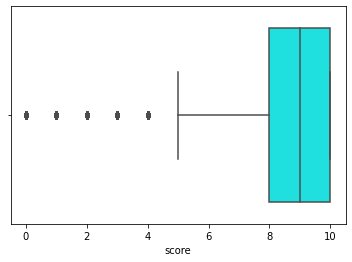

Boxplot of score
Q1 is :  9.0
Q2 is :  9.0
Q3 is :  10.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  7.5 , 11.5
number of outliers are: 241941


In [63]:
sns.boxplot(x= df['score'], color='cyan')
plt.show()
print('Boxplot of score')
#calculating the outiers in attribute 
Q1 = df['score'].quantile(0.50)
Q2 = df['score'].quantile(0.50)
Q3 = df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
print('Q1 is : ',Q1)
print('Q2 is : ',Q2)
print('Q3 is : ',Q3)
print('IQR is:',IQR)
print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
bools = (df['score'] < (Q1 - 1.5 *IQR)) |(df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())

In [64]:
#Removing outliers
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['score'] > (Q1 - 1.5 *IQR)) & (df['score'] < (Q3 + 1.5 *IQR))]
bools = (df['score'] < (Q1 - 1.5 *IQR)) |(df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   
df.shape

number of outliers are: 0


(848829, 3)

##  Cross Validation

In [65]:
cross_validate(algo,data_U, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'fit_time': (0.3247802257537842, 0.34250879287719727, 0.30936670303344727),
 'test_rmse': array([2.62387501, 2.63855485, 2.62268746]),
 'test_time': (0.012928962707519531,
  0.012917757034301758,
  0.01275944709777832)}

 ## Report your findings and inferences

- Samsung Galaxy Note5 is the most popular product.
- 'Amazon Customer'(uid) is the most reviwed author.
- Lenovo Vibe K4 Note (White,16GB) is rated by most of the authors.

## In what business scenario you should use popularity based Recommendation Systems ?

- Popularity based recommendation system works by recommending items viewed by most people and rated high.
- If any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
- No cold start problem.
- We can find the application of popularity based recommendation systems in news, news websites, e-commerce websites for new users.
- Books, movies, advertising are some of the other applications.

## In what business scenario you should use CF based Recommendation Systems ?

- Collaborative filtering filters information by using the interactions and data collected by the system from other users. It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future.
- Collaborative filtering doesn’t require features about the items or users to be known. 
- We can find the application in supermarket’s inventory, a bookstore, media, youtube, e-commerce websites.

## What other possible methods can you think of which can further improve the recommendation for diﬀerent users ? 

- We can make use of Hybrid recommendation systems which can avoid the cold start and sparsity problems by combining the models. 
- There are a number of hybrid recommendations systems like Switching hybridization, Cascade hybridization,  Mixed hybridization, Feature-combination.
- Collecting appropriate data to build a good recommendation system,